In [191]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns

In [192]:
data_root = Path("/Volumes/Samsung_T5/MIT/abcd/release_05/abcd-data-release-5.1/core")
nc_section = "neurocognition"
data_path = Path(data_root, nc_section)
ddis_name = "nc_y_ddis.csv"


In [193]:
float_cols = {'ddis_scr_values_completed', 'ddis_scr_param_delayrewamt',  'ddis_scr_val_immedcho', 
              'ddis_scr_val_indif_point_6h', 'ddis_scr_val_indif_pnt_1da','ddis_scr_val_indif_pnt_1week', 'ddis_scr_val_indif_pnt_1mth',
              'ddis_scr_val_indif_pnt_3mth', 'ddis_scr_val_indif_pnt_1yr','ddis_scr_val_indif_pnt_5yr' }
dtype_dict = { v : 'float' for v  in float_cols}


ddis = pd.read_csv(Path(data_path, ddis_name))

In [194]:
ddis_1y = ddis.query("eventname == '1_year_follow_up_y_arm_1'") # select time batch 
ddis_comp = ddis_1y.query("ddis_scr_values_completed == 1" ) # select completed task 
sub_ids = np.load(Path(data_root, 'subset_subjects_ids.npy')) # select 200 first subject ids for testing 
mask_subset = ddis_comp["src_subject_id"].isin(sub_ids)
ddis_ = ddis_comp[mask_subset]
ddis_.head()

,src_subject_id,eventname,ddis_scr_script_startdte,ddis_scr_script_starttme,ddis_scr_subjectid,ddis_scr_session,ddis_scr_script_elaptme,ddis_scr_computer_platform,ddis_scr_values_completed,ddis_scr_param_delayrewamt,...,ddis_scr_val_indif_pnt_5yr,ddis_scr_expr_mnrt_allcho,ddis_scr_expr_medrt_allcho,ddis_scr_expr_mnrt_immcho,ddis_scr_expr_medrt_immedcho,ddis_scr_expr_mnrt_delaycho,ddis_scr_expr_medrt_delaycho,ddis_scr_val_cons_per_jbcrit1,ddis_scr_val_jbpass1_num_violations,ddis_scr_val_cons_per_jbcrit2
0,NDAR_INV003RTV85,1_year_follow_up_y_arm_1,2019-09-16,11:13:51,NDAR_INV003RTV85 1_year_follow_up_y_arm_1 01,1,159143,ios,1,100,...,99.21875,1795.6428571428571103752,1428,NaN,NaN,1795.6428571428571103752,1428,yes,0.0,no
2,NDAR_INV005V6D2C,1_year_follow_up_y_arm_1,2019-02-09,14:45:56,NDAR_INV005V6D2C 1_year_follow_up_y_arm_1 01,1,205675,ios,1,100,...,75.78125,1729,1454.5,1730.647059,1643,1727.88,1376,no,2.0,no
5,NDAR_INV00BD7VDC,1_year_follow_up_y_arm_1,2019-04-24,18:05:33,NDAR_INV00BD7VDC 1_year_follow_up_y_arm_1 01,1,183324,ios,1,100,...,67.96875,1809.5,1590,1344.2,1144,1954.90625,1777,no,1.0,yes
6,NDAR_INV00CY2MDM,1_year_follow_up_y_arm_1,2018-09-04,18:13:13,NDAR_INV00CY2MDM 1_year_follow_up_y_arm_1 01,1,697310,ios,1,100,...,50.78125,4319.97619,3743.5,5610.363636,4622,3862.096774,3190,no,NaN,yes
8,NDAR_INV00HEV6HB,1_year_follow_up_y_arm_1,2018-08-15,12:10:37,NDAR_INV00HEV6HB 1_year_follow_up_y_arm_1 01,1,156551,ios,1,100,...,2.34375,1185.166667,1159.5,1271.583333,1222.5,1069.944444,1069,no,NaN,yes


In [195]:
#dict to access data in ddis
# key are values in days 
time_vars = {0 : 'ddis_scr_val_immedcho', 0.25 :'ddis_scr_val_indif_point_6h', 1 :'ddis_scr_val_indif_pnt_1da' ,7 :'ddis_scr_val_indif_pnt_1week', 30: 'ddis_scr_val_indif_pnt_1mth',90 :'ddis_scr_val_indif_pnt_3mth',365: 'ddis_scr_val_indif_pnt_1yr', 1780: 'ddis_scr_val_indif_pnt_5yr'}

In [196]:
type(ddis_[time_vars[0.25]][0])

str

<Axes: xlabel='ddis_scr_val_indif_point_6h', ylabel='count'>

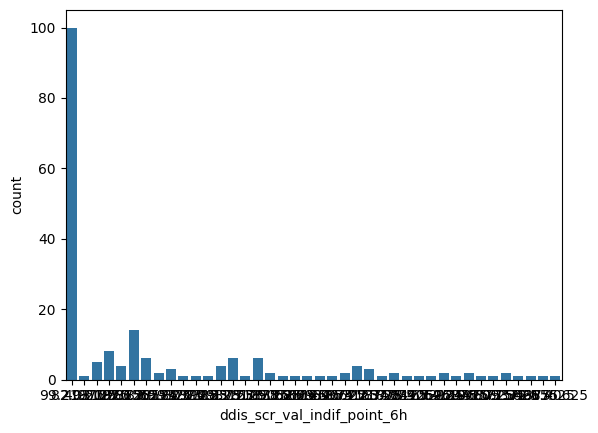

In [197]:
sns.countplot(x = time_vars[0.25], data= ddis_)

Text(0.5, 1.0, '6h')

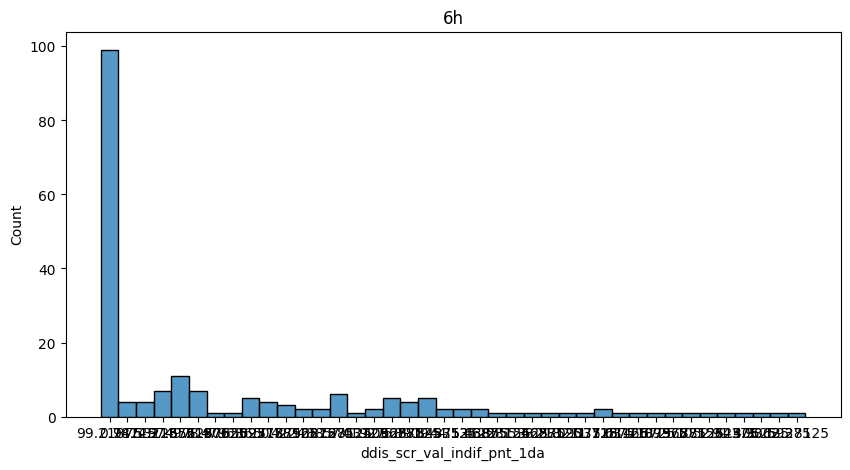

In [198]:
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(x = time_vars[1], data= ddis_)
ax.set_title('6h')

In [199]:
ddis.keys()

Index(['src_subject_id', 'eventname', 'ddis_scr_script_startdte',
       'ddis_scr_script_starttme', 'ddis_scr_subjectid', 'ddis_scr_session',
       'ddis_scr_script_elaptme', 'ddis_scr_computer_platform',
       'ddis_scr_values_completed', 'ddis_scr_param_delayrewamt',
       'ddis_scr_val_testdelays', 'ddis_scr_val_immedcho',
       'ddis_scr_val_indif_point_6h', 'ddis_scr_val_indif_pnt_1da',
       'ddis_scr_val_indif_pnt_1week', 'ddis_scr_val_indif_pnt_1mth',
       'ddis_scr_val_indif_pnt_3mth', 'ddis_scr_val_indif_pnt_1yr',
       'ddis_scr_val_indif_pnt_5yr', 'ddis_scr_expr_mnrt_allcho',
       'ddis_scr_expr_medrt_allcho', 'ddis_scr_expr_mnrt_immcho',
       'ddis_scr_expr_medrt_immedcho', 'ddis_scr_expr_mnrt_delaycho',
       'ddis_scr_expr_medrt_delaycho', 'ddis_scr_val_cons_per_jbcrit1',
       'ddis_scr_val_jbpass1_num_violations', 'ddis_scr_val_cons_per_jbcrit2'],
      dtype='object')

In [200]:


def hyperbolic_dicount( v,a,  d): # V = indiff value, a = delayed reward  , D = delay
    delay = np.full_like(v, 0.25)
    print(type(a), type(v), type(delay))
    k = (a - v ) / (v * delay)
    return k

In [201]:
delayed_reward = ddis_['ddis_scr_param_delayrewamt']
delayed_reward

0      100
2      100
5      100
6      100
8      100
      ... 
337    100
339    100
340    100
341    100
343    100
Name: ddis_scr_param_delayrewamt, Length: 198, dtype: int64

In [202]:
print(ddis_[time_vars[0.25]].astype(float), delayed_reward)

0      99.21875
2      82.03125
5      99.21875
6      99.21875
8      49.21875
         ...   
337    99.21875
339    96.09375
340    99.21875
341    99.21875
343    97.65625
Name: ddis_scr_val_indif_point_6h, Length: 198, dtype: float64 0      100
2      100
5      100
6      100
8      100
      ... 
337    100
339    100
340    100
341    100
343    100
Name: ddis_scr_param_delayrewamt, Length: 198, dtype: int64


In [203]:
k025 = hyperbolic_dicount(ddis_[time_vars[0.25]].astype(float), delayed_reward, 0.25)
k1 = hyperbolic_dicount(ddis_[time_vars[1]].astype(float), delayed_reward, 1)
k7 = hyperbolic_dicount(ddis_[time_vars[7]].astype(float), delayed_reward, 7)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [204]:
data_k = {'subject': ddis_['src_subject_id'],
          'k025' :k025,
          'k1' :k1,
          'k7' : k7
          }
k = pd.DataFrame(data_k)
k.set_index('subject', inplace=True)
k

,k025,k1,k7
subject,,,
NDAR_INV003RTV85,0.031496,0.031496,0.031496
NDAR_INV005V6D2C,0.876190,508.000000,0.031496
NDAR_INV00BD7VDC,0.031496,0.231405,0.031496
NDAR_INV00CY2MDM,0.031496,0.031496,4.126984
NDAR_INV00HEV6HB,4.126984,0.031496,12.516129
...,...,...,...
NDAR_INV0GND16RW,0.031496,0.031496,0.031496
NDAR_INV0GPKYMDC,0.162602,0.031496,0.302521
NDAR_INV0GUTM6AM,0.031496,0.031496,0.031496


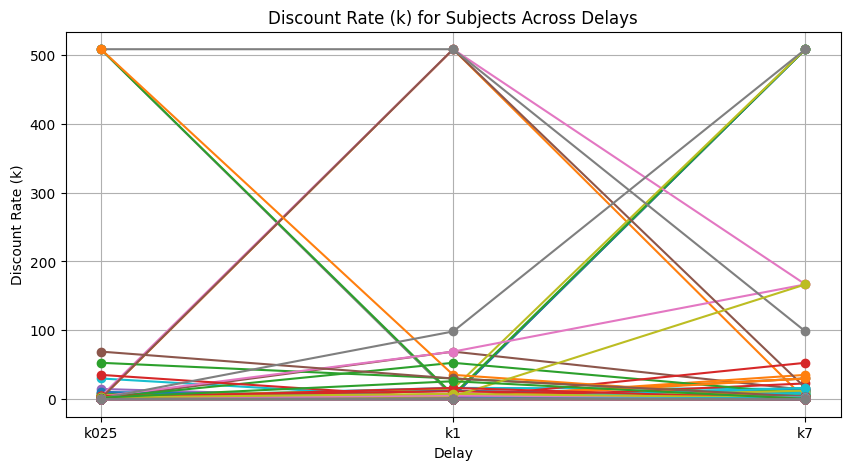

In [205]:
plt.figure(figsize=(10,5))
for subject in k.index:
    plt.plot(k.columns, k.loc[subject], marker = 'o', label = subject)
    
plt.title('Discount Rate (k) for Subjects Across Delays')
plt.xlabel('Delay')
plt.ylabel('Discount Rate (k)')
plt.grid(True)
plt.show()

In [206]:
plt.figure(figsize=(10,5))
melt_k = k.reset_index().melt(id_vars='subject', var_name='delay', value_name= 'k_val')
melt_k

,subject,delay,k_val
0,NDAR_INV003RTV85,k025,0.031496
1,NDAR_INV005V6D2C,k025,0.876190
2,NDAR_INV00BD7VDC,k025,0.031496
3,NDAR_INV00CY2MDM,k025,0.031496
4,NDAR_INV00HEV6HB,k025,4.126984
...,...,...,...
589,NDAR_INV0GND16RW,k7,0.031496
590,NDAR_INV0GPKYMDC,k7,0.302521
591,NDAR_INV0GUTM6AM,k7,0.031496
592,NDAR_INV0GVW93X6,k7,0.162602


<Figure size 1000x500 with 0 Axes>

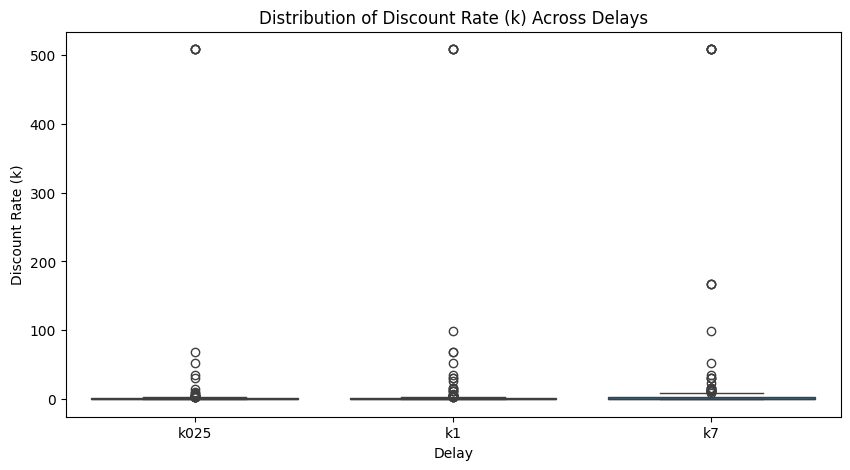

In [207]:
plt.figure(figsize=(10,5))
sns.boxplot(data = melt_k, x = 'delay', y= 'k_val')
plt.title('Distribution of Discount Rate (k) Across Delays')
plt.xlabel('Delay')
plt.ylabel('Discount Rate (k)')
plt.show()

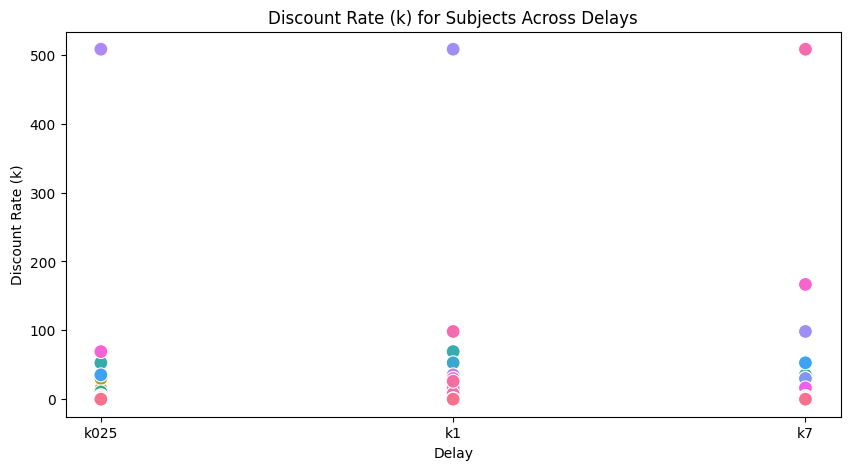

In [208]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = melt_k, x= 'delay', y= 'k_val', hue= 'subject', s=100, legend=False)
plt.title('Discount Rate (k) for Subjects Across Delays')
plt.xlabel('Delay')
plt.ylabel('Discount Rate (k)')
plt.show()

<Axes: ylabel='subject'>

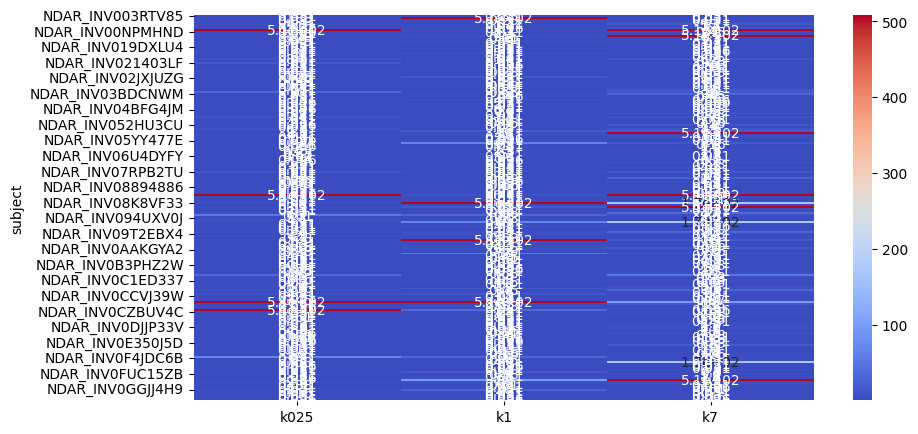

In [209]:
plt.figure(figsize=(10,5))
sns.heatmap(data= k, annot=True, cmap = 'coolwarm', cbar=True )